In [5]:
import pandas as pd
import numpy as np
import netCDF4 as nc
import xarray as xr
import os

In [6]:
#path de los archivos
path = f'{workspace}tesis/datos/procesados/'
chirps = path + 'chirps20072020.nc'
mswep = path + 'mswep20072020.nc'

In [7]:
#abro mis archivos y los guardo en una variable
ds_chirps = xr.open_dataset(chirps, engine='netcdf4')
ds_mswep = xr.open_dataset(mswep, engine='netcdf4')

/Users/santiagogimenez/miniconda3/envs/tesis-env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


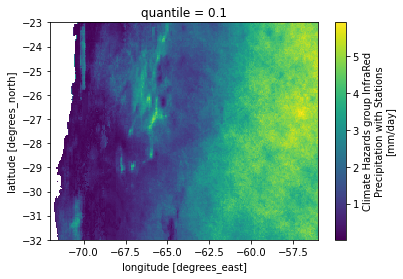

In [8]:
#muestro CHIRPS
ds_chirpsSinTrazas = ds_chirps.where(ds_chirps.precip > 0.01)
ds_chirpsSinTrazasPercentil10 = ds_chirpsSinTrazas.quantile(0.1, dim='time',keep_attrs=True,skipna=True)
ds_chirpsSinTrazasPercentil10.to_netcdf(path=path+'chirpsSinTrazasPercentil10.nc', engine='netcdf4')
ds_chirpsSinTrazasPercentil10.precip.plot()

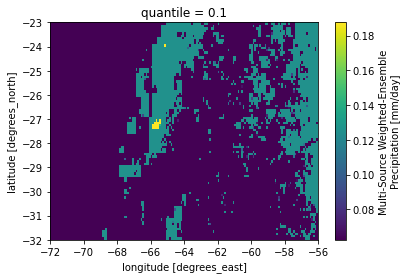

In [9]:
#muestro MSWEP 
ds_mswepSinTrazas = ds_mswep.where(ds_mswep.precipitation > 0.01)
ds_mswepSinTrazasPercentil10 = ds_mswepSinTrazas.quantile(0.1, dim='time', keep_attrs=True, skipna=True)
ds_mswepSinTrazasPercentil10.to_netcdf(path=path+'mswepSinTrazasPercentil10.nc', engine='netcdf4')
ds_mswepSinTrazasPercentil10.precipitation.plot()